Notebook description: <br>

This notebook is created to analysis the kinematics data obtained after running the tracking code. <br>

Most of the tracking and analysis codes are written by Duncan and pieced together in this notebook.

### Import experiment (tracked and with kinematics data).

In [2]:
from behavior_analysis.experiment import  BehaviorExperiment
import pandas as pd
# Open experiment
experiment = BehaviorExperiment.open(r"C:\Users\manyung.ng\Documents\behaviour_analysis\behavior_analysis_tracking\test_analysis")
print(experiment)
# Open video and bout info
video_info = pd.read_csv(experiment.directory.joinpath('video_data.csv'), dtype={'ID': str, 'code': str})
bouts_df = pd.read_csv(experiment.subdirs["analysis"].joinpath('bouts.csv'),
                        dtype={'ID': str, 'code': str})

name: recordings
date: 2025-06-17
animal_data: fish_data.csv
video_data: video_data.csv
mask_data: mask_data.csv
bout_detection: {'threshold': 0.025, 'winsize': 0.2}



### Data information

- Fish ID in the format 'YYYYMMDDNN' (year, month, day, zero-padded fish number; e.g. fish_1 on 2025_05_29 would be 20250529) <br>

- Video code in the format 'IDHHMMSS' (fish_ID, hour, minute, second) <br>

- Number of rows == number of frames in the video

#### Description of data in the "kinematics/code + .csv"
| Column name | Column data description |
| --- | --- |
| 'k0' - 'k(n-1)' | angle of tangents between n successive tail points |
| 'tip' | the average curvature (tail angle) over the last 20% of the tail|
| 'length' | the length of the tail (useful for finding tracking errors) |
| 'left' | the angle of the left eye relative to the heading |
| 'right' | the angle of the right eye relative to the heading |
| 'speed' | the instantaneous speed in each frame |
| 'angular_velocity' | the instantaneous angular velocity in each frame |
| 'tracked' | whether kinematic data exists from the frame |

## Eye convergence analysis

Before running Duncan's analysis codes, let's check out what the eye angle looks like by simply plotting them out!

In [ ]:
# load kinematics data
# example data info:
# fish: progeny of mafaa:QF2, ath5:Cre, QUAS:switchNTR outX (fish_6)
# condition: -NTR, +Ron (no mafaa+ RGC ablation)
# videos: 500fps (unstable fps for this test recording), 2.5min each, 12 recordings (30min) in total

# first video of the trial, no paramecia
test_kinematics_df1 = pd.read_csv(experiment.subdirs['kinematics'].joinpath("2025052906/2025052906184727.062.csv")).get(["speed", "angular_velocity","left_angle","right_angle"])
# 7th video of the trial, with paramecia
test_kinematics_df2 = pd.read_csv(experiment.subdirs['kinematics'].joinpath("2025052906/2025052906190234.886.csv")).get(["speed", "angular_velocity","left_angle","right_angle"])
# last video of the trial, with paramecia
test_kinematics_df3 = pd.read_csv(experiment.subdirs['kinematics'].joinpath("2025052906/2025052906191511.458.csv")).get(["speed", "angular_velocity","left_angle","right_angle"])
print(test_kinematics_df1, test_kinematics_df2)
test_kinematics_df3

            speed  angular_velocity  left_angle  right_angle
0        0.000000          0.588480   -0.278325    -0.270930
1        0.000000          0.000000   -0.278325    -0.270930
2        0.000000          0.791894   -0.278325    -0.270930
3        0.000000          0.000000   -0.269634    -0.270463
4        0.000000         -0.395537   -0.260943    -0.269995
...           ...               ...         ...          ...
75028  310.633911          0.611256   -0.380618     0.483142
75029  243.116472          9.237982   -0.380618     0.483142
75030  450.007787         14.198900   -0.380544     0.483298
75031  290.085781          2.849197   -0.380618     0.482862
75032         NaN               NaN   -0.380618     0.481159

[75033 rows x 4 columns]             speed  angular_velocity  left_angle  right_angle
0       85.830440         -0.164113   -0.328744     0.458371
1       32.418349         -0.544593   -0.328744     0.458503
2        0.000000          0.000000   -0.328744     0.45863

,speed,angular_velocity,left_angle,right_angle
0,0.000000,-0.360625,-0.424484,0.482915
1,0.000000,0.000000,-0.424215,0.482756
2,71.294542,-0.140583,-0.423945,0.482598
3,0.000000,0.000000,-0.423945,0.482096
4,40.279963,0.000000,-0.423945,0.481594
...,...,...,...,...
75030,170.143477,0.397055,-0.385046,0.291853
75031,125.933352,1.224614,-0.389721,0.293082
75032,0.000000,0.000000,-0.389721,0.293082
75033,0.000000,0.000000,-0.389721,0.293082


In [ ]:
# try plotting with seaborn
import seaborn as sns
# set figure size
sns.set_theme(rc={"figure.figsize": (20,5)})

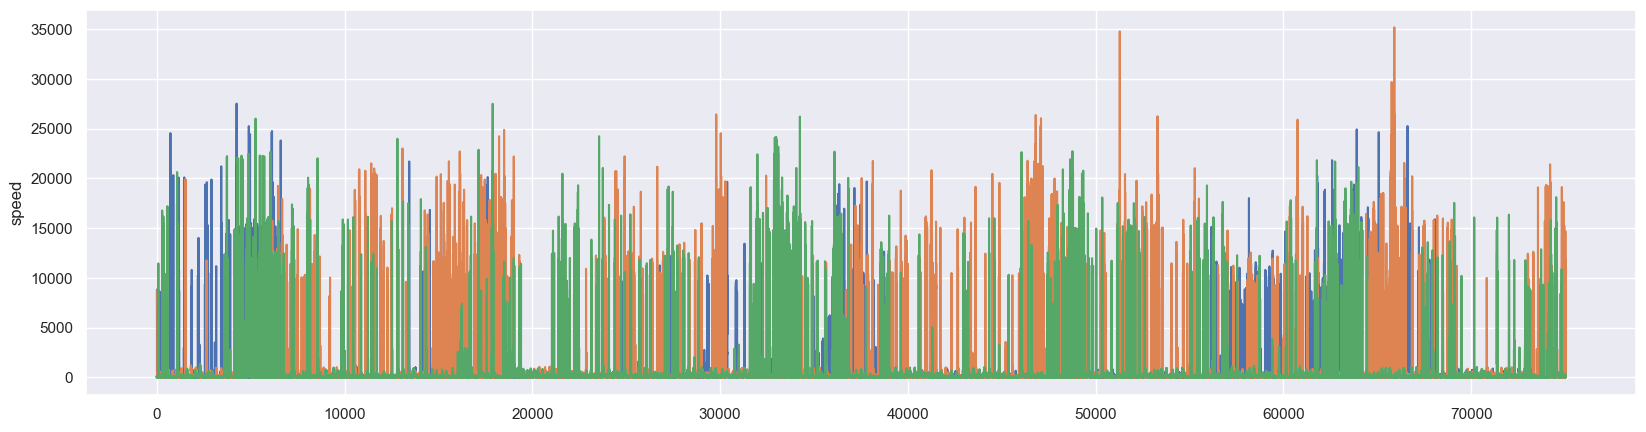

In [ ]:
# check out the speed of the fish
sns.lineplot(data=test_kinematics_df1, x=test_kinematics_df1.index, y="speed") # in blue
sns.lineplot(data=test_kinematics_df2, x=test_kinematics_df2.index, y="speed") # in orange
sns.lineplot(data=test_kinematics_df3, x=test_kinematics_df3.index, y="speed") # in green

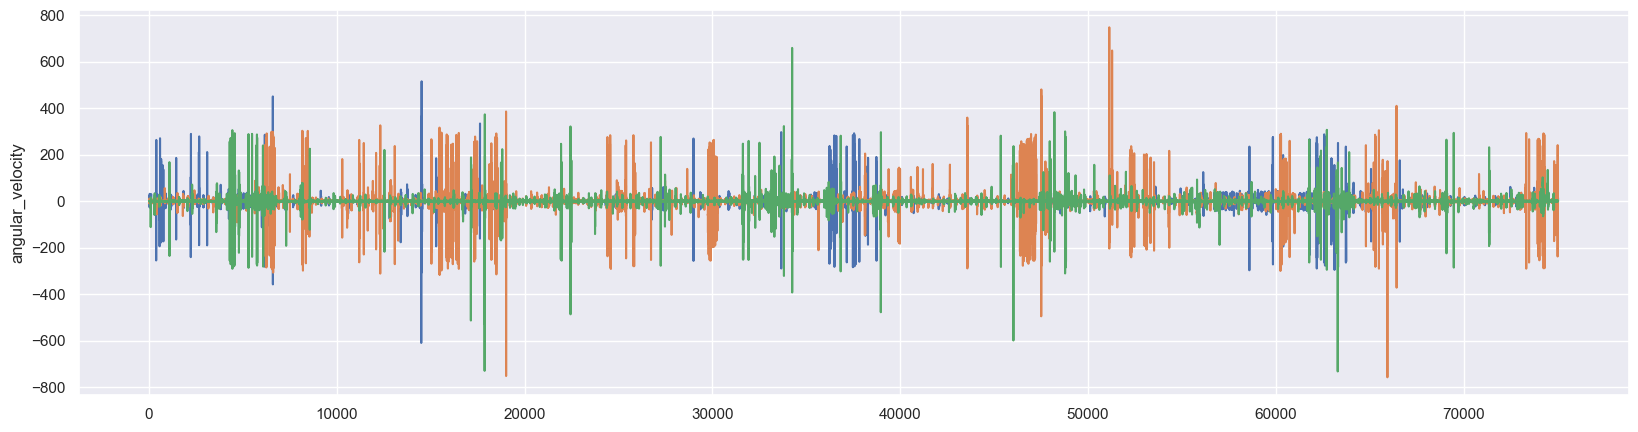

In [76]:
# check out the angular velocity of the fish
sns.lineplot(data=test_kinematics_df1, x=test_kinematics_df1.index, y="angular_velocity") # in blue
sns.lineplot(data=test_kinematics_df2, x=test_kinematics_df2.index, y="angular_velocity") # in orange
sns.lineplot(data=test_kinematics_df3, x=test_kinematics_df3.index, y="angular_velocity") # in green

In [81]:
# melt the df for better plotting with seaborn
test_kinematics_df1 = pd.melt(
    test_kinematics_df1,
    id_vars= ['speed','angular_velocity'], # these columns will be kept the same
    value_vars= ['left_angle','right_angle'], # these columns will be melted
    var_name= "direction", # the column name 'left_angle' and 'right_angle' will now label the angle degree in a separate column
    value_name= "angle (degree)", # the values of the 'left_angle' and 'right_angle' columns are now in one columns
    ignore_index=False # the index information is retained, this is the number of frames, can be used as a proxy of time
)
test_kinematics_df1

,speed,angular_velocity,direction,angle (degree)
0,0.000000,0.588480,left_angle,-0.278325
1,0.000000,0.000000,left_angle,-0.278325
2,0.000000,0.791894,left_angle,-0.278325
3,0.000000,0.000000,left_angle,-0.269634
4,0.000000,-0.395537,left_angle,-0.260943
...,...,...,...,...
75028,310.633911,0.611256,right_angle,0.483142
75029,243.116472,9.237982,right_angle,0.483142
75030,450.007787,14.198900,right_angle,0.483298
75031,290.085781,2.849197,right_angle,0.482862


In [82]:
# description same as above but for the second df
test_kinematics_df2 = pd.melt(
    test_kinematics_df2,
    id_vars= ['speed','angular_velocity'],
    value_vars= ['left_angle','right_angle'],
    var_name= "direction",
    value_name= "angle (degree)", 
    ignore_index=False
)
test_kinematics_df2

,speed,angular_velocity,direction,angle (degree)
0,85.830440,-0.164113,left_angle,-0.328744
1,32.418349,-0.544593,left_angle,-0.328744
2,0.000000,0.000000,left_angle,-0.328744
3,0.000000,0.663012,left_angle,-0.329600
4,0.000000,0.000000,left_angle,-0.330456
...,...,...,...,...
75030,85.750758,-0.530077,right_angle,-0.251490
75031,113.408380,0.530077,right_angle,-0.251490
75032,0.000000,-0.530077,right_angle,-0.250673
75033,0.000000,0.390279,right_angle,-0.249855


In [83]:
# description same as above but for the third df
test_kinematics_df3 = pd.melt(
    test_kinematics_df3,
    id_vars= ['speed','angular_velocity'],
    value_vars= ['left_angle','right_angle'],
    var_name= "direction",
    value_name= "angle (degree)", 
    ignore_index=False
)
test_kinematics_df3

,speed,angular_velocity,direction,angle (degree)
0,0.000000,-0.360625,left_angle,-0.424484
1,0.000000,0.000000,left_angle,-0.424215
2,71.294542,-0.140583,left_angle,-0.423945
3,0.000000,0.000000,left_angle,-0.423945
4,40.279963,0.000000,left_angle,-0.423945
...,...,...,...,...
75030,170.143477,0.397055,right_angle,0.291853
75031,125.933352,1.224614,right_angle,0.293082
75032,0.000000,0.000000,right_angle,0.293082
75033,0.000000,0.000000,right_angle,0.293082


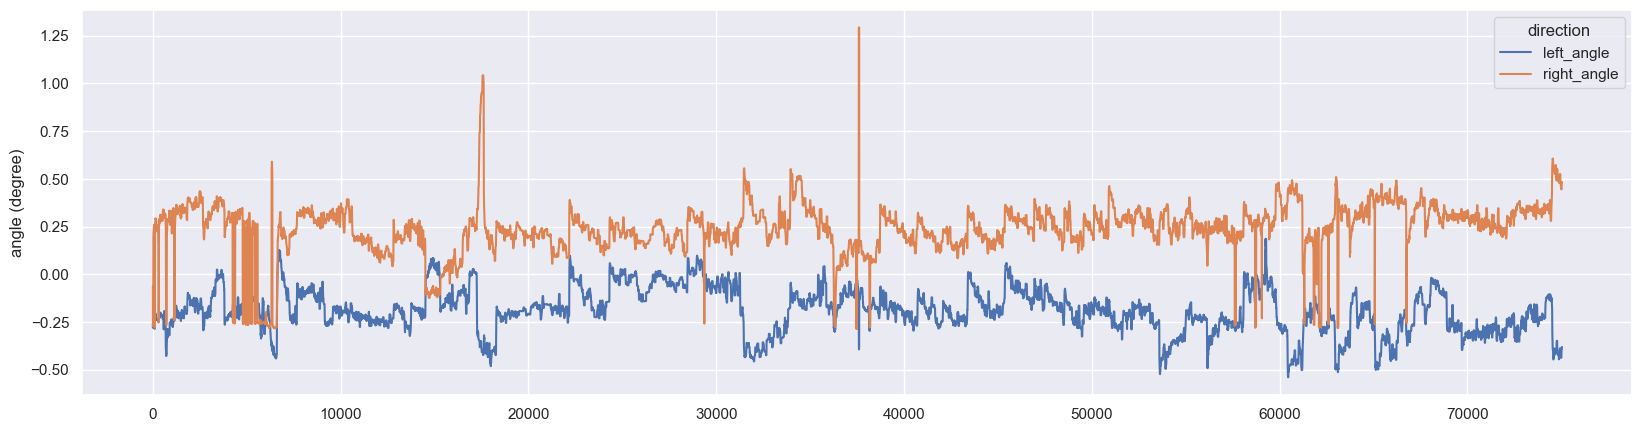

In [ ]:
# at the beginning of trial, before introduction of paramecia
sns.lineplot(data=test_kinematics_df1, x=test_kinematics_df1.index, y="angle (degree)", hue="direction", legend="auto")

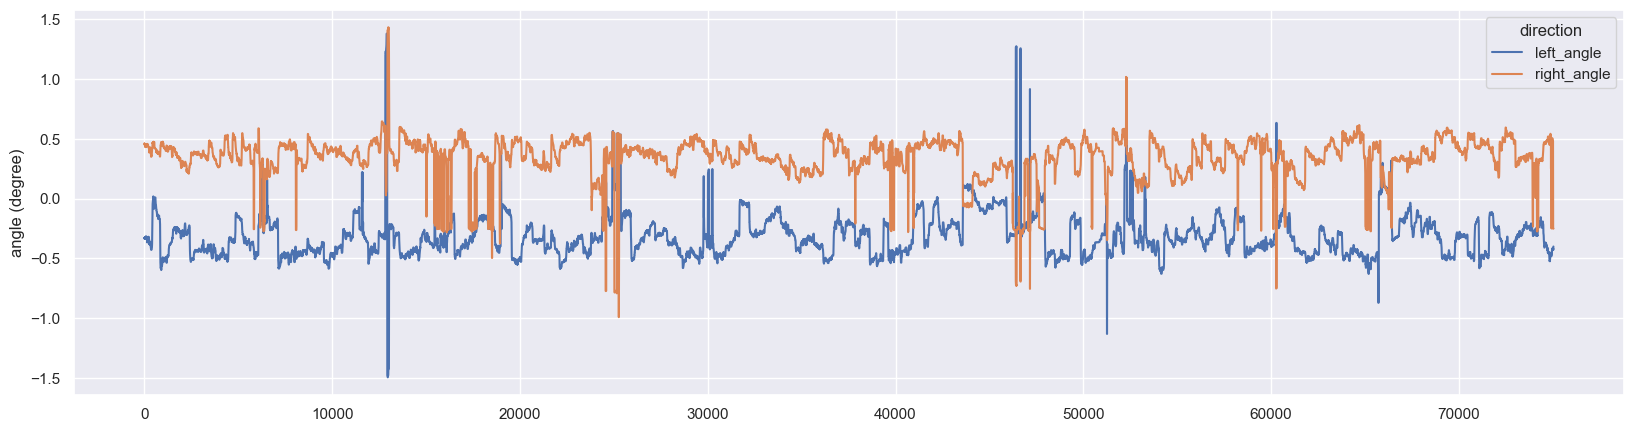

In [ ]:
# in the middle of trial, after introduction of paramecia
sns.lineplot(data=test_kinematics_df2, x=test_kinematics_df2.index, y="angle (degree)", hue="direction", legend="auto")

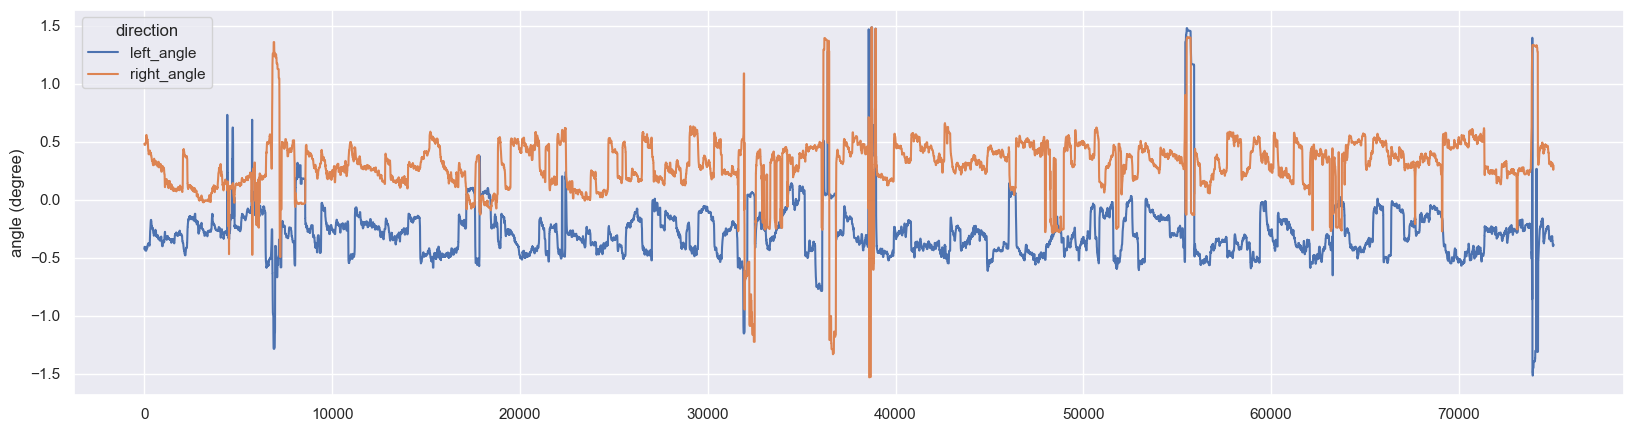

In [86]:
# at the end of the trial, after introduction of paramecia
sns.lineplot(data=test_kinematics_df3, x=test_kinematics_df3.index, y="angle (degree)", hue="direction", legend="auto")

In [94]:
# load kinematics data
# example data info:
# fish: progeny of mafaa:QF2, ath5:Cre, QUAS:switchNTR outX (fish_4)
# condition: +NTR, +Ron (mafaa+ RGC ablation)
# videos: 500fps (unstable fps for this test recording), 2.5min each, 12 recordings (30min) in total

# first video of the trial, no paramecia
test_kinematics_df1 = pd.read_csv(experiment.subdirs['kinematics'].joinpath("2025052904/2025052904171728.966.csv")).get(["speed", "angular_velocity","left_angle","right_angle"])
# 8th video of the trial, with paramecia
test_kinematics_df2 = pd.read_csv(experiment.subdirs['kinematics'].joinpath("2025052904/2025052904173507.652.csv")).get(["speed", "angular_velocity","left_angle","right_angle"])
# last video of the trial, with paramecia
test_kinematics_df3 = pd.read_csv(experiment.subdirs['kinematics'].joinpath("2025052904/2025052904174512.799.csv")).get(["speed", "angular_velocity","left_angle","right_angle"])
print(test_kinematics_df1, test_kinematics_df2)
test_kinematics_df3

           speed  angular_velocity  left_angle  right_angle
0      27.263227          0.229038   -0.348636     0.261309
1      20.971132          0.000000   -0.349079     0.261277
2       0.000000          0.000000   -0.349522     0.261245
3       0.000000          0.000000   -0.349522     0.255600
4      20.971132          0.209190   -0.349522     0.249955
...          ...               ...         ...          ...
63384  49.277189         -0.732637   -0.250591     0.246732
63385  57.872444         -0.302332   -0.244935     0.245415
63386   0.000000          0.000000   -0.244202     0.245415
63387   0.000000          0.141668   -0.243470     0.245415
63388        NaN               NaN   -0.243402     0.245348

[63389 rows x 4 columns]             speed  angular_velocity  left_angle  right_angle
0      150.011928          0.005122   -0.240682     0.162098
1        0.000000          0.000000   -0.240633     0.165039
2       37.958908          0.048470   -0.240585     0.167980
3       37

,speed,angular_velocity,left_angle,right_angle
0,63.995860,0.035335,-0.335977,0.328614
1,116.032147,0.000000,-0.334249,0.329417
2,31.292071,-0.165190,-0.332998,0.330220
3,175.899136,-1.102019,-0.334488,0.330535
4,74.509690,-0.400742,-0.335977,0.330850
...,...,...,...,...
75027,34.654717,-1.281039,-0.475125,1.375637
75028,0.000000,0.000000,-0.475125,1.375637
75029,0.000000,0.000000,-0.475125,1.375637
75030,0.000000,0.000000,-0.475125,1.375637


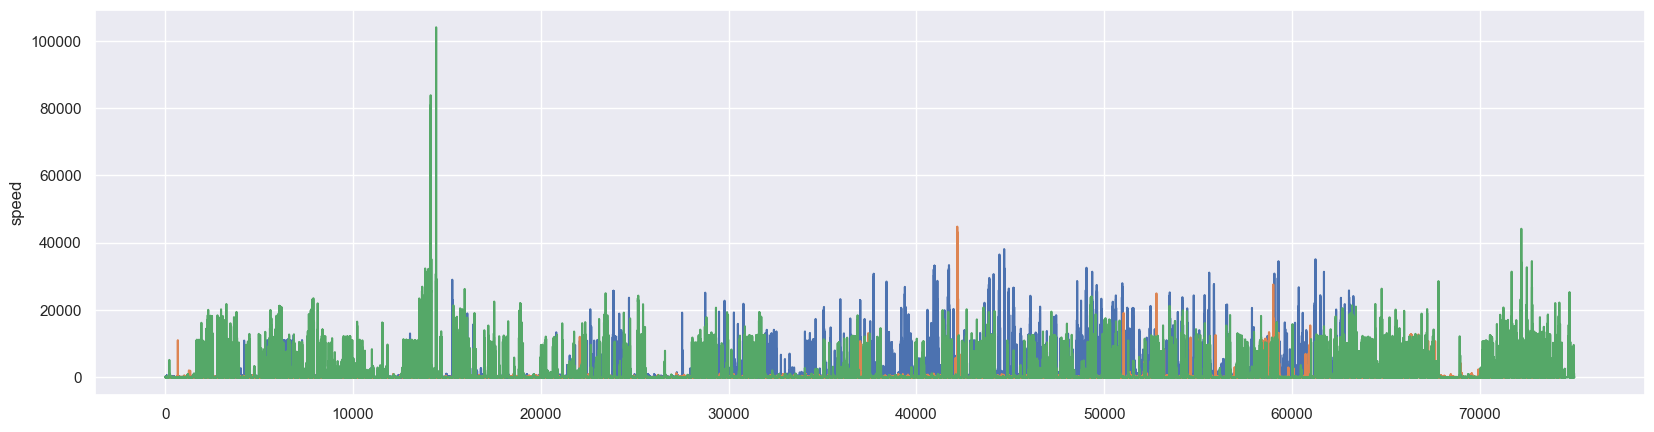

In [91]:
# check out the speed of the fish
sns.lineplot(data=test_kinematics_df1, x=test_kinematics_df1.index, y="speed") # in blue
sns.lineplot(data=test_kinematics_df2, x=test_kinematics_df2.index, y="speed") # in orange
sns.lineplot(data=test_kinematics_df3, x=test_kinematics_df3.index, y="speed") # in green

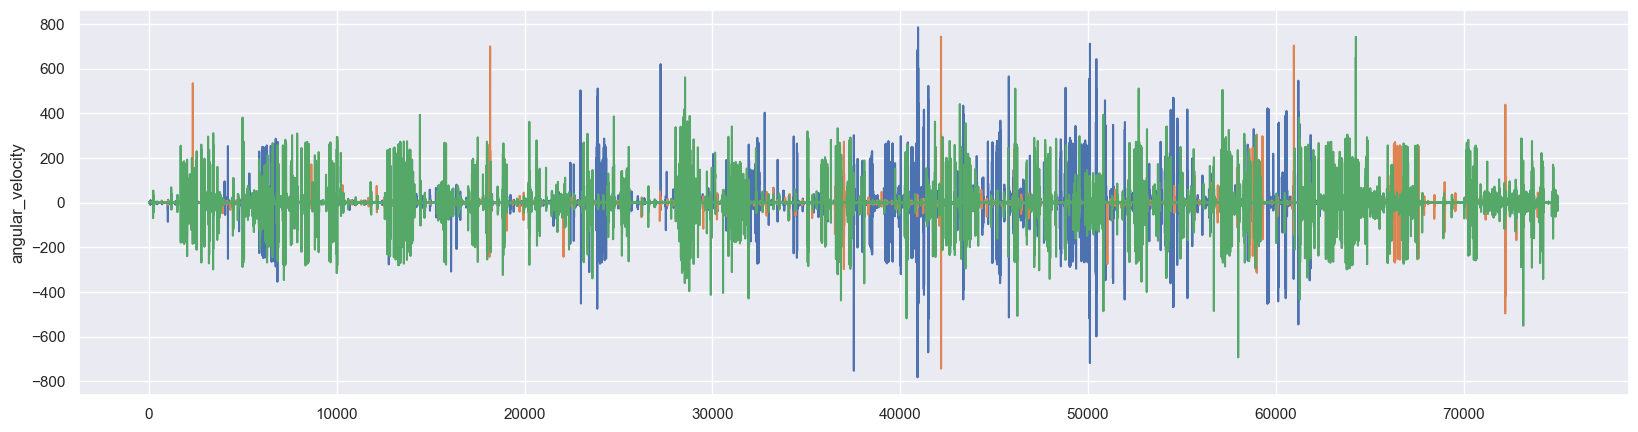

In [92]:
# check out the angular velocity of the fish
sns.lineplot(data=test_kinematics_df1, x=test_kinematics_df1.index, y="angular_velocity") # in blue
sns.lineplot(data=test_kinematics_df2, x=test_kinematics_df2.index, y="angular_velocity") # in orange
sns.lineplot(data=test_kinematics_df3, x=test_kinematics_df3.index, y="angular_velocity") # in green

In [ ]:
# melt the df for better plotting with seaborn
test_kinematics_df1 = pd.melt(
    test_kinematics_df1,
    id_vars= ['speed','angular_velocity'], # these columns will be kept the same
    value_vars= ['left_angle','right_angle'], # these columns will be melted
    var_name= "direction", # the column name 'left_angle' and 'right_angle' will now label the angle degree in a separate column
    value_name= "angle (degree)", # the values of the 'left_angle' and 'right_angle' columns are now in one columns
    ignore_index=False # the index information is retained, this is the number of frames, can be used as a proxy of time
)

test_kinematics_df2 = pd.melt(
    test_kinematics_df2,
    id_vars= ['speed','angular_velocity'],
    value_vars= ['left_angle','right_angle'],
    var_name= "direction",
    value_name= "angle (degree)", 
    ignore_index=False
)

test_kinematics_df3 = pd.melt(
    test_kinematics_df3,
    id_vars= ['speed','angular_velocity'],
    value_vars= ['left_angle','right_angle'],
    var_name= "direction",
    value_name= "angle (degree)", 
    ignore_index=False
)
test_kinematics_df3 # check if it's melted

,speed,angular_velocity,direction,angle (degree)
0,63.995860,0.035335,left_angle,-0.335977
1,116.032147,0.000000,left_angle,-0.334249
2,31.292071,-0.165190,left_angle,-0.332998
3,175.899136,-1.102019,left_angle,-0.334488
4,74.509690,-0.400742,left_angle,-0.335977
...,...,...,...,...
75027,34.654717,-1.281039,right_angle,1.375637
75028,0.000000,0.000000,right_angle,1.375637
75029,0.000000,0.000000,right_angle,1.375637
75030,0.000000,0.000000,right_angle,1.375637


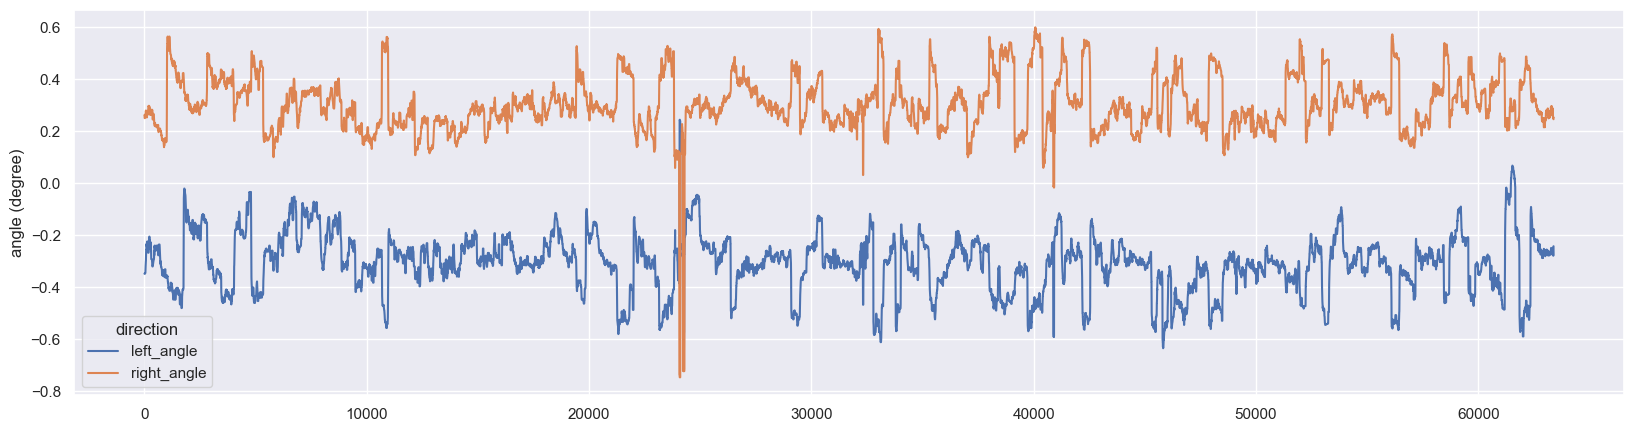

In [96]:
# at the beginning of trial, before introduction of paramecia
sns.lineplot(data=test_kinematics_df1, x=test_kinematics_df1.index, y="angle (degree)", hue="direction", legend="auto")

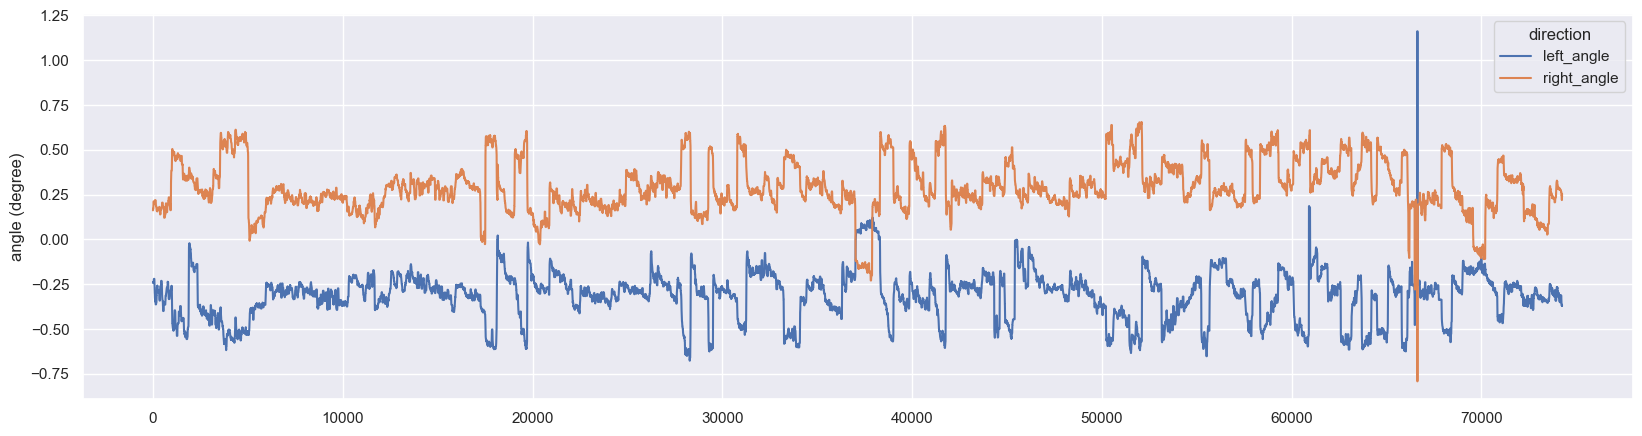

In [97]:
# in the middle of trial, after introduction of paramecia
sns.lineplot(data=test_kinematics_df2, x=test_kinematics_df2.index, y="angle (degree)", hue="direction", legend="auto")

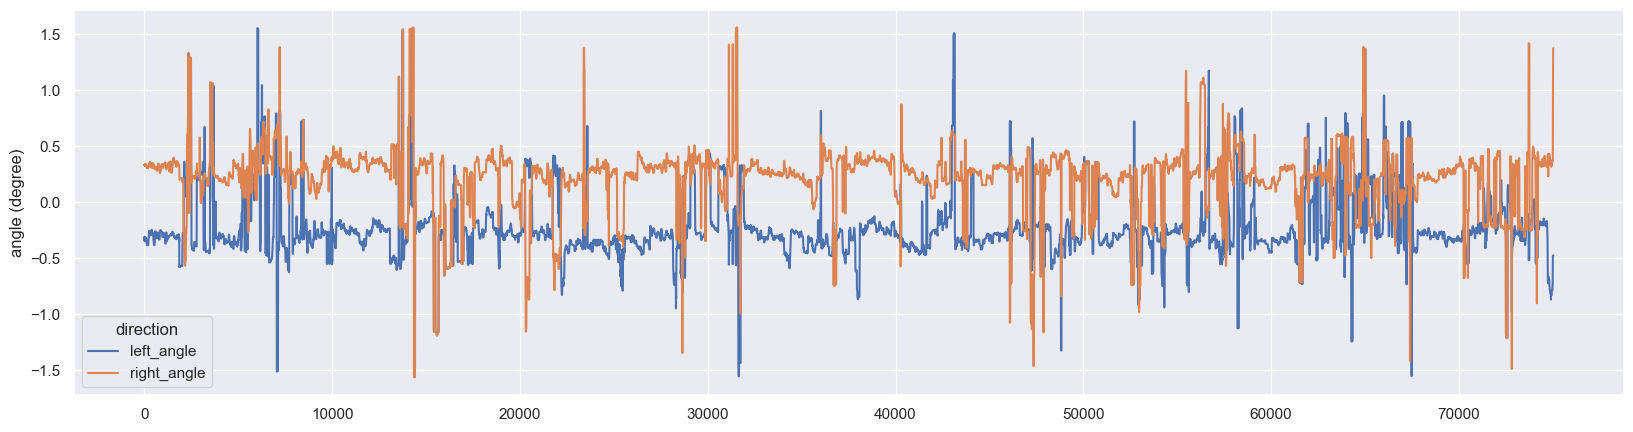

In [98]:
# at the end of the trial, after introduction of paramecia
sns.lineplot(data=test_kinematics_df3, x=test_kinematics_df3.index, y="angle (degree)", hue="direction", legend="auto")

In [2]:
from behavior_analysis.experiment import BehaviorExperiment
from behavior_analysis.analysis.bouts import BoutData
from behavior_analysis.analysis import eye_convergence
from behavior_analysis.utilities.manage_files_helpers import create_folder
from pathlib import Path
import os

In [3]:
output_directory = create_folder(experiment.subdirs['analysis'], 'eye_convergence')
convergence_scores_path = os.path.join(output_directory, 'convergence_scores.csv')

eye_tracking = eye_convergence.EyeData.from_metadata(experiment.directory.joinpath('fish_data.csv'), experiment.subdirs['kinematics'])

Opening 51 csv files...
##########done!
DataFrame has shape: (3659897, 57).
Index levels: ('ID', 'code', 'frame').



In [24]:
for code in bouts_df['code'].unique():
    if ID in bouts_df["ID"].unique():
        kinematics_path = experiment.subdirs['kinematics'].joinpath(ID).joinpath(code + ".csv")
        # print(kinematics_path)
        eye_angles = pd.read_csv(kinematics_path, dtype={'ID': str, 'code': str})
# eye_angles
#convergence = eye_convergence.calculate_convergence(bouts_df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [66]:
plots_directory = create_folder(output_directory, 'plots')
convergence_scores = eye_convergence.EyeConvergenceAnalysis.calculate_convergence_score(eye_tracking)
convergence_scores.to_csv(convergence_scores_path, index=False)
eye_convergence.EyeConvergenceAnalysis.plot_histogram(convergence_scores, output_path= plots_directory)

AttributeError: 'EyeData' object has no attribute 'convergence'

In [18]:
bouts_path = os.path.join(experiment.subdirs['analysis'], 'bouts.csv')
bouts_df = pd.read_csv(bouts_path, index_col=0, dtype={'ID': str, 'video_code': str})

eye_convergence_directory = os.path.join(experiment.subdirs['analysis'], 'eye_convergence')
convergence_scores_path = os.path.join(eye_convergence_directory, 'convergence_scores.csv')

convergence_scores = pd.read_csv(convergence_scores_path, dtype={'ID': str})

frame_rate = 500.
window = int(0.02 * 500)

# Import bout data
bouts = BoutData.from_directory(bouts_df, experiment.subdirs['kinematics'],
                                check_tail_lengths=False, tail_columns_only=False)

print_heading('CLASSIFYING BOUTS')
convergence_states = np.empty((len(bouts_df), 4))
i = 0
for idx, fish_info in convergence_scores.iterrows():
    print(fish_info.ID)
    for bout in bouts.list_bouts(IDs=[fish_info.ID]):
        bout_convergence = np.degrees(bout['right'] - bout['left'])
        convergence_start = bout_convergence[:window].mean()
        convergence_end = bout_convergence[-window:].mean()
        convergence_states[i, :2] = np.array([convergence_start, convergence_end])
        convergence_states[i, 2:] = (np.array([convergence_start, convergence_end]) >= fish_info.threshold)
        i += 1
assert i == len(convergence_states), 'Incorrect number of bouts!'
np.save(os.path.join(eye_convergence_directory, 'convergence_states.npy'), convergence_states)

FileNotFoundError: [Errno 2] File C:\Users\manyung.ng\Documents\behaviour_analysis\behavior_analysis_tracking\test_analysis\analysis\eye_convergence\convergence_scores.csv does not exist: 'C:\\Users\\manyung.ng\\Documents\\behaviour_analysis\\behavior_analysis_tracking\\test_analysis\\analysis\\eye_convergence\\convergence_scores.csv'

## Bout mapping

In [6]:
from behavior_analysis.experiment import BehaviorExperiment
from behavior_analysis.analysis.bouts import BoutData
from behavior_analysis.analysis.bout_mapping import calculate_distance_matrix_templates, interpolate_nd
from behavior_analysis.utilities.timer import Timer
import pandas as pd
import numpy as np
from pathlib import Path
import os

In [7]:
if __name__ == "__main__":
    # Open template bouts
    template_directory = Path(r'J:\Duncan Mearns\behavior_mapping')
    template_frame_rate = 500.
    # Open 1744 exemplar bouts representative of all behaviors
    exemplars_df = pd.read_csv(template_directory.joinpath('exemplars.csv'),
                               dtype={'ID': str, 'code': str})
    # Open tail statistics and eigenfish for bout mapping
    eigenfish = np.load(template_directory.joinpath('eigenfish.npy'))
    eigenfish = eigenfish[:3]  # take first three eigenfish only
    mean, std = np.load(template_directory.joinpath('tail_statistics.npy'))
    # Import template bouts
    templates = BoutData.from_metadata(exemplars_df, template_directory.joinpath("kinematics"))
    # Map template bouts onto eigenfish
    templates = templates.map(vectors=eigenfish, whiten=True, mean=mean, std=std)
    templates = templates.to_list(values=True)
    print(len(templates))
    print(templates[0].shape)

Opening 681 csv files...


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
if __name__ == "__main__":
    # Import bouts
    bouts = BoutData.from_metadata(bouts_df, experiment.subdirs["kinematics"], tail_only=True)
    # Map bouts onto eigenfish
    bouts = bouts.map(vectors=eigenfish, whiten=True, mean=mean, std=std)
    # Start timer
    timer = Timer()
    analysis_times = []
    timer.start()
    # distance matrix
    distances = {}
    # Iterate through fish
    output_directory = experiment.subdirs["analysis"].joinpath('bout_distances')
    if not output_directory.exists():
        output_directory.mkdir(parents=True)
    for ID in bouts.metadata['ID'].unique():
        # Save distance matrix for each fish to bout_distances folder in analysis directory
        output_path = output_directory.joinpath(ID + '.npy')
        path_exist = create_filepath(output_directory, ID, '.npy', True)
        # load distance matrix if the calculation is already performed.
        if path_exist:
            distances[ID] = np.load(output_path)
            print('distance matrices loaded.')
        if not output_path.exists():
            print(ID + '...', end=' ')
            # Interpolate bouts to correct frame rate
            fish_bouts = []
            for i, bout in bouts.iter(IDs=[ID], values=True):
                code = bouts.metadata.loc[i, 'code']
                fps = video_info[video_info['code'] == code].squeeze().fps
                interp = interpolate_nd(bout, fps, template_frame_rate)
                fish_bouts.append(interp)
            # Calculate distance matrix
            D = calculate_distance_matrix_templates(fish_bouts, templates, fs=template_frame_rate)
            # Save distance matrix
            np.save(output_path, D)
            # Show time taken
            time_taken = timer.lap()
            analysis_times.append(time_taken)
            print(timer.convert_time(time_taken))
    average_time = timer.average
    print(f'Total time: {timer.convert_time(timer.stop())}')
    print(f'Average time: {timer.convert_time(average_time)}')

In [ ]:
distances_df = {"ID": distances}
distances_df = pd.DataFrame.from_dict(distances_df)
distances_df

{'ID': {'2025052901': array([[   594.63690566,    602.25356471,    592.46181876, ...,
             622.65944313,    437.79849277,    416.03782588],
         [   899.31453783,    911.62084822,    946.48550441, ...,
             926.96621981,    746.399745  ,    718.7528547 ],
         [   877.12596895,    786.52540852,    869.60960981, ...,
             841.48512722,    651.2428436 ,    677.20462238],
         ...,
         [   859.6941537 ,    889.63900355,    951.82616798, ...,
             908.24237765,    681.09783619,    660.91312106],
         [261835.55494616, 261837.08654446, 261911.17051351, ...,
          261886.3906826 , 261622.23129113, 261594.0507287 ],
         [ 20545.22734257,  20328.20362278,  20596.30522344, ...,
           20525.22468824,  20554.60284008,  20526.29131712]]),
  '2025052903': array([[  985.38848268,   915.64789378,  1050.81924416, ...,
           1007.45145019,   779.15366496,   791.16495203],
         [  538.84618221,   548.75748748,   610.09204832, ..

In [ ]:
# this chunk keeps crashing vscode.
# let's run line by line to see where the crash occur.
# Assign exemplars
mapped_bouts = bouts #.map(eigenfish, whiten=True, mean=mean, std=std)
mapped_bouts['exemplar'] = None
for ID, fish_distances in distances.iteritems():
    bout_idxs = mapped_bouts[mapped_bouts['ID'] == ID].index
    nearest_exemplar = np.argmin(fish_distances, axis=1)
    mapped_bouts.loc[bout_idxs, 'exemplar'] = nearest_exemplar
mapped_bouts.to_csv(os.path.join(experiment.subdirs['analysis'], 'mapped_bouts.csv'))

ValueError: Unable to coerce to Series, length must be 3: given 50

## Bout classification

In [ ]:
from behavior_analysis.experiment import BehaviorExperiment
from behavior_analysis.analysis.bouts import BoutData
from behavior_analysis.analysis.eye_convergence import calculate_convergence
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform
from pathlib import Path
import numpy as np
from behavior_analysis.analysis.bout_mapping import calculate_distance_matrix_templates, interpolate_nd
from matplotlib import pyplot as plt

In [ ]:
if __name__ == "__main__":

    experiment = BehaviorExperiment.open(r"C:\Users\manyung.ng\Documents\behaviour_analysis\behavior_analysis_tracking\test_analysis")
    print(experiment)
    bouts_path = experiment.subdirs['analysis'].joinpath('bouts.csv')
    bouts_df = pd.read_csv(bouts_path, dtype={'ID': str, 'video_code': str})
    video_info = pd.read_csv(experiment.directory.joinpath('video_data.csv'), dtype={'ID': str, 'video_code': str})

    # Average eye convergence over 20 ms
    window = 0.02

    # Import convergence data
    fish_convergence = pd.read_csv('', dtype={'ID': str})
    convergence_states = []
    # Import bout data
    bouts = BoutData.from_metadata(bouts_df, experiment.subdirs['kinematics'], tail_only=False)
    for i, bout in bouts.iter():
        # Bout info
        bout_info = bouts.metadata.loc[i]
        fps = video_info[video_info["code"] == bout_info.code].squeeze().fps
        ID = bout_info.ID
        fish_info = fish_convergence[fish_convergence["ID"] == ID].squeeze()
        # Calculate convergence
        bout_convergence = np.degrees(calculate_convergence(bout))
        w = int(window * fps)
        convergence_start = bout_convergence[:w].mean()
        convergence_end = bout_convergence[-w:].mean()
        convergence_states.append(np.array([convergence_start, convergence_end]) >= fish_info.threshold)
    convergence_states = np.array(convergence_states)
    # Find bout phases
    spontaneous = (~convergence_states[:, 0]) & (~convergence_states[:, 1])
    early = (~convergence_states[:, 0]) & (convergence_states[:, 1])
    mid = (convergence_states[:, 0]) & (convergence_states[:, 1])
    late = (convergence_states[:, 0]) & (~convergence_states[:, 1])
    phase_labels = np.column_stack([spontaneous, early, mid, late])
    phase_labels = np.argwhere(phase_labels)[:, 1]
    bouts_df['phase'] = phase_labels
    bouts_df.to_csv(experiment.subdirs["analysis"].joinpath("bout_convergence_labels.csv"), index=False)


## Behaviour analysis (Mearns et al., 2020)

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.spatial import distance as ssd
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams["figure.dpi"] = 150

In [ ]:
# set data path
data_path = Path(r"C:\Users\manyung.ng\Documents\behaviour_analysis\behavior_analysis_tracking\test_analysis")

In [ ]:
# import metadata
md = pd.read_csv(data_path.joinpath("mapped_bouts.csv"), index_col="bout_index", dtype={"ID": str, "video_code": str})

In [ ]:
md

In [ ]:
bout_md = md.loc[0]
bout_md

In [ ]:
trial_path = data_path.joinpath("kinematics", bout_md["ID"], bout_md["video_code"] + ".csv")
trial_kinematics = pd.read_csv(trial_path)